In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset

df = pd.read_csv('Salary_Data.csv')

In [3]:
# Viewing few rows of data

print('----- Few rows of data -----')
print(df.sample(10))

print('\n\n')
print('----- Features in the dataset ----')
print(df.columns)

print('\n\n')
print('---- Shape of the dataset -----')
print(df.shape)

----- Few rows of data -----
    YearsExperience    Salary
13              4.1   57081.0
24              8.7  109431.0
15              4.9   67938.0
8               3.2   64445.0
23              8.2  113812.0
5               2.9   56642.0
18              5.9   81363.0
10              3.9   63218.0
25              9.0  105582.0
26              9.5  116969.0



----- Features in the dataset ----
Index(['YearsExperience', 'Salary'], dtype='object')



---- Shape of the dataset -----
(30, 2)


In [4]:
# Check for null values

df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
# Converting dataset to dependant and independant vectors

# YearsExperience
X = df.iloc[:, :-1].values

#Salary
y = df.iloc[:, 1].values

In [6]:
# Splitting the dataset into testing and training set's

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Dimensions of datset after splitting into testing and training set's

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(6, 1)
(24,)
(6,)


In [8]:
# Fitting Simple Linear Regression model to the training data

from sklearn.linear_model import LinearRegression

# Instantiating LinearRegression Model

linear_regression = LinearRegression()

# Fitting to the training data

linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
# Predicting dependant variable using independant variable

predictions = linear_regression.predict(X_test)

In [52]:
# Lets view predicted and original salaries 

print('Predicted             -    Original')
for pos in range(0, len(predictions)):
    print(f'{predictions[pos]:<{25}}  {y_test[pos]:<{15}}')

Predicted             -    Original
115573.6228835191          112635.0       
71679.93878158767          67938.0        
102498.90847017782         113812.0       
75415.57147111374          83088.0        
55803.499851101835         64445.0        
60473.04071300943          57189.0        
122110.98009018974         122391.0       
107168.44933208541         109431.0       
63274.76523015399          56957.0        


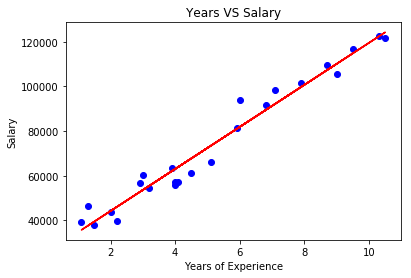

In [10]:
# Training data VS Regression line

plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, linear_regression.predict(X_train), color='red')
plt.title('Years VS Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

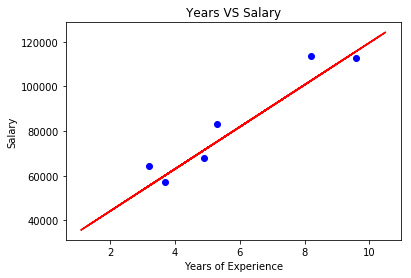

In [11]:
# Test data VS Regression line
# Regression line is drawn using predicted values for test set

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train, linear_regression.predict(X_train), color='red')
plt.title('Years VS Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [17]:
#import library

from sklearn.metrics import mean_squared_error,r2_score

# model evaluation for training set

y_train_predict = linear_regression.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = linear_regression.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5205.982110155719
R2 score is 0.9645401573418146


The model performance for testing set
--------------------------------------
RMSE is 7059.04362190151
R2 score is 0.9024461774180497


In [132]:
# For finding slope for new regression line

Xm = np.mean(X_train)
Ym = np.mean(y_train)
sum1 = 0
sum2 = 0
print('Experience Salary     d=Xi-Xm               e=Yi-Ym             d*e                  e*e')
print('------------------------------------------------------------------------------------------------')
for pos in range(0, len(X_train)):
    d = (X_train[pos] - Xm)
    e = (y_train[pos] - Ym)
    sum1 = sum1 + d*e
    sum2 = sum2 = d*d
    print(f'{str(X_train[pos]):{10}} {str(y_train[pos]):{10}} {str(X_train[pos]-Xm):{20}} {str(y_train[pos]-Ym):20} {str(d*e):{20}} {str(d*d):{20}}')

Experience Salary     d=Xi-Xm               e=Yi-Ym             d*e                  e*e
------------------------------------------------------------------------------------------------
[1.1]      39343.0    [-3.73333333]        -31714.33333333333   [118400.17777778]    [13.93777778]       
[2.2]      39891.0    [-2.63333333]        -31166.33333333333   [82071.34444444]     [6.93444444]        
[5.1]      66029.0    [0.26666667]         -5028.3333333333285  [-1340.88888889]     [0.07111111]        
[2.9]      56642.0    [-1.93333333]        -14415.333333333328  [27869.64444444]     [3.73777778]        
[4.1]      57081.0    [-0.73333333]        -13976.333333333328  [10249.31111111]     [0.53777778]        
[4.]       55794.0    [-0.83333333]        -15263.333333333328  [12719.44444444]     [0.69444444]        
[7.9]      101302.0   [3.06666667]         30244.66666666667    [92750.31111111]     [9.40444444]        
[1.3]      46205.0    [-3.53333333]        -24852.33333333333   [87811.5